<a href="https://colab.research.google.com/github/lmntrx-sys/Research/blob/main/Deep_learning__basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Compute gradients of the Gaussian function

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Formulate the equation

class Gaussian():

    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def __call__(self, x):
        return np.exp(-(x - self.mu)**2 / (2 / self.sigma**2))

    def grad(self, x):
        return -(x - self.mu) * self(x) / self.sigma**2


In [ ]:
# Create synthetic data

x = np.linspace(-5, 5, 10)
y = Gaussian(0, 1)(x)
gradients = Gaussian(0,1).grad(x)
print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')

# Show the gradients

print(f'gradients: {gradients}')

x.shape: (10,)
y.shape: (10,)
gradients: [ 1.86332659e-05  2.02212789e-03  5.86379346e-02  4.15587015e-01
  4.76109384e-01 -4.76109384e-01 -4.15587015e-01 -5.86379346e-02
 -2.02212789e-03 -1.86332659e-05]


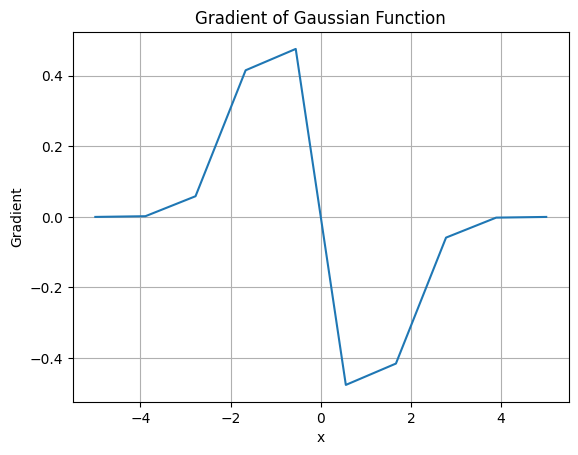

In [ ]:

# Show the gradients

#print(f'gradients: {y}')

plt.plot(x, gradients)
plt.xlabel("x")
plt.ylabel("Gradient")
plt.title("Gradient of Gaussian Function")
plt.grid(True)
plt.show()

In [ ]:
import torch

# Use torch autograd to compute the gradients

class GaussianTorch(torch.nn.Module):
    def __init__(self, mu, sigma):
        super(GaussianTorch, self).__init__()
        self.mu = mu
        self.sigma = sigma

    def forward(self, x):
        return torch.exp(-(x - self.mu)**2 / (2 * self.sigma**2))



Gradients computed with torch.autograd:
tensor([ 1.8633e-05,  2.0221e-03,  5.8638e-02,  4.1559e-01,  4.7611e-01,
        -4.7611e-01, -4.1559e-01, -5.8638e-02, -2.0221e-03, -1.8633e-05],
       dtype=torch.float64)


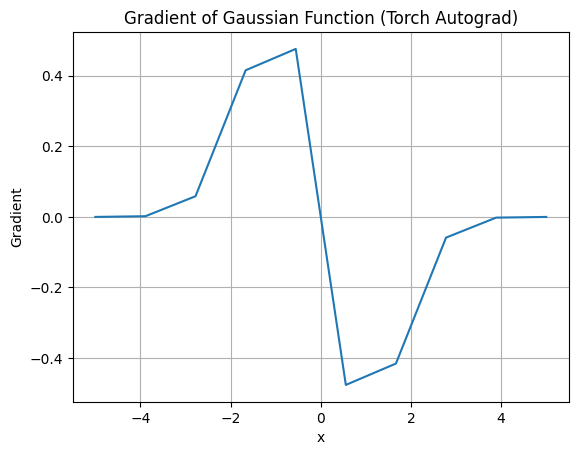

In [ ]:
# prompt: create some pytorch code that can compute the gaussian gradients using torch.autograd function

# Use torch autograd to compute the gradients

x_tensor = torch.tensor(x, requires_grad=True)
gaussian_torch = GaussianTorch(0, 1)
y_tensor = gaussian_torch(x_tensor)

# Compute gradients using autograd
y_tensor.backward(torch.ones_like(y_tensor)) # Calculate gradients of y with respect to x
gradients_torch = x_tensor.grad

print(f"Gradients computed with torch.autograd:\n{gradients_torch}")

plt.plot(x, gradients_torch.detach().numpy()) # detach to convert to numpy
plt.xlabel("x")
plt.ylabel("Gradient")
plt.title("Gradient of Gaussian Function (Torch Autograd)")
plt.grid(True)
plt.show()